### Autoencoder architecture

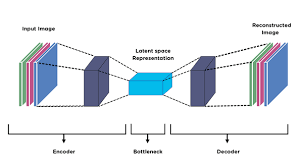

100%|██████████| 9.91M/9.91M [00:00<00:00, 14.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 350kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.19MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.01MB/s]


Epoch 1, Loss: 0.0519
Epoch 2, Loss: 0.0232
Epoch 3, Loss: 0.0178
Epoch 4, Loss: 0.0156
Epoch 5, Loss: 0.0143
Epoch 6, Loss: 0.0134
Epoch 7, Loss: 0.0127
Epoch 8, Loss: 0.0121
Epoch 9, Loss: 0.0116
Epoch 10, Loss: 0.0112
Epoch 11, Loss: 0.0110
Epoch 12, Loss: 0.0107
Epoch 13, Loss: 0.0105
Epoch 14, Loss: 0.0103
Epoch 15, Loss: 0.0101
Epoch 16, Loss: 0.0100
Epoch 17, Loss: 0.0099
Epoch 18, Loss: 0.0097
Epoch 19, Loss: 0.0096
Epoch 20, Loss: 0.0095
Epoch 21, Loss: 0.0094
Epoch 22, Loss: 0.0093
Epoch 23, Loss: 0.0092
Epoch 24, Loss: 0.0092
Epoch 25, Loss: 0.0091
Epoch 26, Loss: 0.0090
Epoch 27, Loss: 0.0090
Epoch 28, Loss: 0.0089
Epoch 29, Loss: 0.0088
Epoch 30, Loss: 0.0088
Epoch 31, Loss: 0.0087
Epoch 32, Loss: 0.0087
Epoch 33, Loss: 0.0086
Epoch 34, Loss: 0.0086
Epoch 35, Loss: 0.0085
Epoch 36, Loss: 0.0085
Epoch 37, Loss: 0.0085
Epoch 38, Loss: 0.0084
Epoch 39, Loss: 0.0084
Epoch 40, Loss: 0.0084
Epoch 41, Loss: 0.0083
Epoch 42, Loss: 0.0083
Epoch 43, Loss: 0.0083
Epoch 44, Loss: 0.00

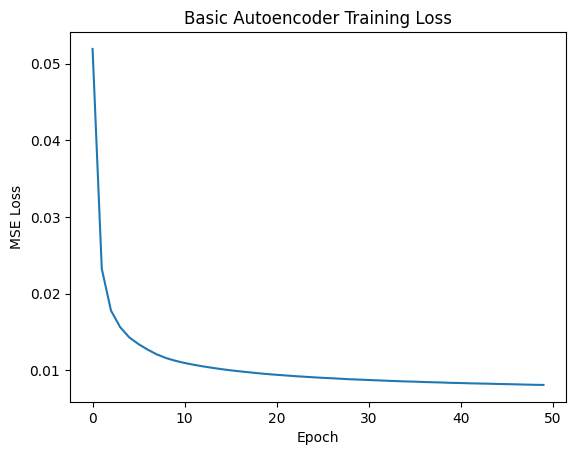

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

class BasicAutoencoder(nn.Module):
    """
    Basic Autoencoder from Rumelhart et al. (1986) concept
    Simple encoder-decoder architecture with bottleneck
    """
    def __init__(self, input_dim=784, hidden_dim=128, latent_dim=32):
        super(BasicAutoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, latent_dim),
            nn.ReLU()
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()  # Since we're using MNIST (0-1 values)
        )

    def forward(self, x):
        # Flatten image
        x = x.view(x.size(0), -1)

        # Encode
        latent = self.encoder(x)

        # Decode
        reconstructed = self.decoder(latent)
        reconstructed = reconstructed.view(x.size(0), 1, 28, 28)

        return reconstructed, latent

def train_basic_ae():
    # Load MNIST dataset
    transform = transforms.Compose([transforms.ToTensor()])

    train_dataset = torchvision.datasets.MNIST(
        root='./data', train=True, download=True, transform=transform
    )
    test_dataset = torchvision.datasets.MNIST(
        root='./data', train=False, download=True, transform=transform
    )

    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

    # Initialize model
    model = BasicAutoencoder()
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
    criterion = nn.MSELoss()

    # Training loop
    losses = []
    for epoch in range(50):
        model.train()
        epoch_loss = 0

        for batch_idx, (data, _) in enumerate(train_loader):
            optimizer.zero_grad()

            reconstructed, latent = model(data)
            loss = criterion(reconstructed, data)

            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        losses.append(avg_loss)
        print(f'Epoch {epoch+1}, Loss: {avg_loss:.4f}', 'accuracy:{}')

    return model, losses

# Train and visualize
model, losses = train_basic_ae()

# Plot training loss
plt.plot(losses)
plt.title('Basic Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.show()